<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [274]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 7.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [6]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head(25)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
data.shape

(2938, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [6]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
data2 = data.drop(['Population','GDP', 'Hepatitis B'], axis=1)

In [5]:
data2.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [19]:
missing = data2[data2.isna().any(axis=1)]

In [20]:
missing.shape

(382, 19)

In [28]:
missing2 = data[data['Total expenditure'].isnull()]

In [29]:
missing2['Year'].value_counts()

2015    181
2002      4
2001      4
2000      4
2011      3
2010      3
2009      3
2008      3
2007      3
2006      3
2005      3
2004      3
2003      3
2014      2
2013      2
2012      2
Name: Year, dtype: int64

In [30]:
missing2 = data[data['Alcohol'].isnull()]

In [31]:
missing2['Year'].value_counts()

2015    177
2005      2
2013      2
2014      1
2012      1
2011      1
2010      1
2009      1
2008      1
2007      1
2006      1
2004      1
2003      1
2002      1
2001      1
2000      1
Name: Year, dtype: int64

In [129]:
missing2 = data[data['Income composition of resources'].isnull()]

In [130]:
missing2['Year'].value_counts()

2013    17
2015    10
2014    10
2012    10
2011    10
2010    10
2009    10
2008    10
2007    10
2006    10
2005    10
2004    10
2003    10
2002    10
2001    10
2000    10
Name: Year, dtype: int64

In [34]:
missing2 = data[data['Schooling'].isnull()]

In [35]:
missing2['Year'].value_counts()

2013    13
2015    10
2014    10
2012    10
2011    10
2010    10
2009    10
2008    10
2007    10
2006    10
2005    10
2004    10
2003    10
2002    10
2001    10
2000    10
Name: Year, dtype: int64

In [38]:
data2.shape

(2938, 19)

In [133]:
data3 = data2.dropna()

In [134]:
data3.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [135]:
data3.shape

(2556, 19)

In [144]:
data3.drop('Year', axis=1,inplace=True)

In [145]:
data3.drop('Country', axis=1, inplace=True)

In [8]:
data3.shape

(2556, 17)

In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2556 non-null   object 
 1   Life expectancy                  2556 non-null   float64
 2   Adult Mortality                  2556 non-null   float64
 3   infant deaths                    2556 non-null   int64  
 4   Alcohol                          2556 non-null   float64
 5   percentage expenditure           2556 non-null   float64
 6   Measles                          2556 non-null   int64  
 7    BMI                             2556 non-null   float64
 8   under-five deaths                2556 non-null   int64  
 9   Polio                            2556 non-null   float64
 10  Total expenditure                2556 non-null   float64
 11  Diphtheria                       2556 non-null   float64
 12   HIV/AIDS           

In [143]:
colnames = data3.columns
colnames

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
new_cols = []
for col in colnames:
    new_cols.append(col.strip())
new_cols

['Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [11]:
rename_dict={}
for col, newcol in zip(colnames, new_cols):
    rename_dict[col] = newcol
rename_dict

{'Status': 'Status',
 'Life expectancy ': 'Life expectancy',
 'Adult Mortality': 'Adult Mortality',
 'infant deaths': 'infant deaths',
 'Alcohol': 'Alcohol',
 'percentage expenditure': 'percentage expenditure',
 'Measles ': 'Measles',
 ' BMI ': 'BMI',
 'under-five deaths ': 'under-five deaths',
 'Polio': 'Polio',
 'Total expenditure': 'Total expenditure',
 'Diphtheria ': 'Diphtheria',
 ' HIV/AIDS': 'HIV/AIDS',
 ' thinness  1-19 years': 'thinness  1-19 years',
 ' thinness 5-9 years': 'thinness 5-9 years',
 'Income composition of resources': 'Income composition of resources',
 'Schooling': 'Schooling'}

In [137]:
data3.rename(rename_dict, axis=1, inplace=True)
data3.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [146]:
target = 'Life expectancy'
X = data3.drop(target, axis=1)
X.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Developing,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Developing,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Developing,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Developing,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [147]:
y = data3[target]
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [16]:
#mask = (X.dtypes == np.object)
#categoricals = X.columns[mask]
categoricals = [key for key, value in X.dtypes.items()  if value=='O']
categoricals

['Status']

In [92]:
oec = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(sparse=False), categoricals)], remainder='passthrough')

In [148]:
X.shape

(2556, 16)

In [53]:
ohc = OneHotEncoder()
ohc.fit_transform(X[categoricals])

<2556x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2556 stored elements in Compressed Sparse Row format>

In [95]:
X = oec.fit_transform(X)

In [96]:
X.shape

(2556, 17)

In [149]:
X = pd.get_dummies(data=X, columns=categoricals)

In [150]:
X.shape

(2556, 17)

In [152]:
X.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,0,1
1,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,0,1
2,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,0,1
3,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,0,1
4,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,0,1


# 2. Objectives


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 17)

# 3. Linear Regression Models


# Simple Linear Regression

In [82]:
steps = [('ss', StandardScaler()), ('lr', LinearRegression())]

In [83]:
pipe = Pipeline(steps)

In [84]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [85]:
pipe.score(X_train, y_train)

0.8331323206316779

In [86]:
pipe.score(X_test, y_test)

0.8268398257165515

In [20]:
features = X.columns
features

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

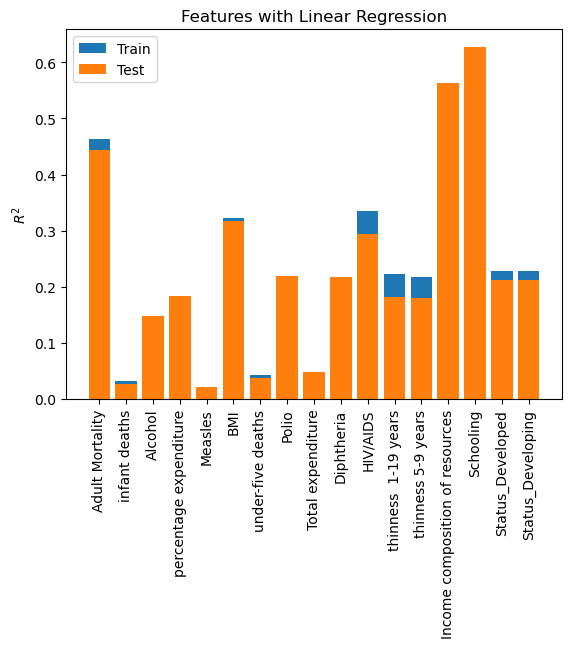

Training R^2 mean value 0.2313135250147617 Testing R^2 mean value 0.23153307250743524 
Training R^2 max value 0.5591224968322905 Testing R^2 max value 0.6272965574544296 


In [96]:
get_R2_features(pipe, features, "Linear")

# Feature Selection Function

In [39]:
def get_R2_features(model, features, type, test=True): 
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.title(("Features with {} Regression").format(type))
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

# Linear Regression with Cross-Validation

In [81]:
splits = 5
kf = KFold(n_splits=splits, random_state=17)

In [83]:
scores = np.zeros((splits, 1))
for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train_k, y_train_k)
    scores[k] = pipe.score(X_test_k, y_test_k)

In [84]:
scores

array([[0.80819924],
       [0.81132209],
       [0.84138702],
       [0.78426425],
       [0.78839925]])

In [85]:
scores.mean()

0.8067143704391168

In [132]:
scores2 = cross_val_score(lr, X, y, scoring='r2', cv=5)

In [133]:
scores2

array([0.80819924, 0.81132209, 0.84138702, 0.78492617, 0.78839925])

In [134]:
scores2.mean()

0.8068467549529643

# Polynomial Regression

In [98]:
steps_poly = [('poly', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('lr', LinearRegression())]

In [99]:
pipe_poly = Pipeline(steps_poly)

In [100]:
pipe_poly.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [101]:
pipe_poly.score(X_train, y_train)

0.9346078362175404

In [102]:
pipe_poly.score(X_test, y_test)

0.8930712037468305

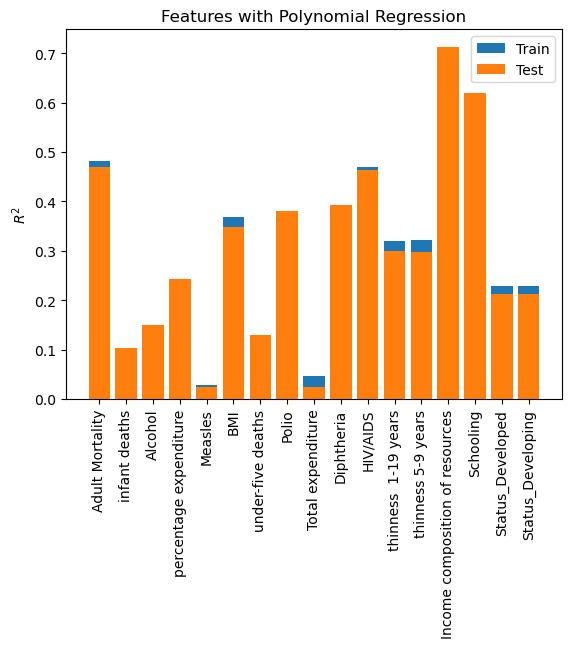

Training R^2 mean value 0.29880237556927414 Testing R^2 mean value 0.29892043844523775 
Training R^2 max value 0.7051788878479971 Testing R^2 max value 0.7123885545500187 


In [103]:
get_R2_features(pipe_poly, features, "Polynomial")

# Simple Ridge Regression

In [104]:
rr = Ridge(alpha=0.1)

In [105]:
rr.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
rr.score(X_train, y_train)

0.8331322594005357

In [107]:
rr.score(X_test, y_test)

0.8268248609747634

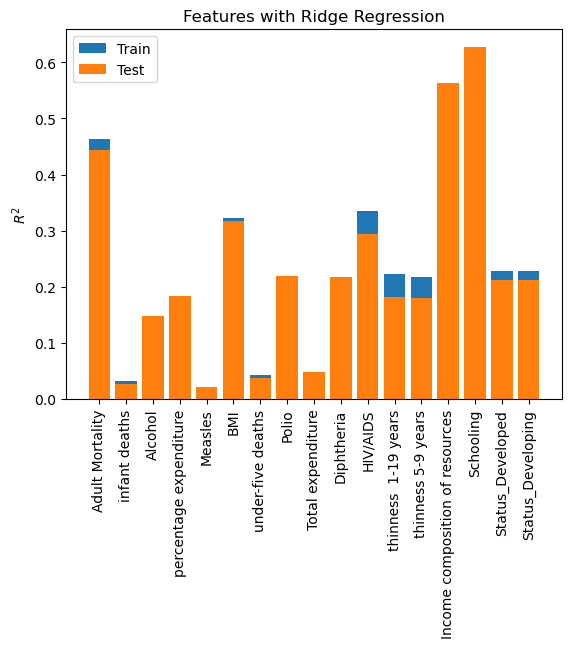

Training R^2 mean value 0.23131348621193812 Testing R^2 mean value 0.23152430661853737 
Training R^2 max value 0.5591224968198116 Testing R^2 max value 0.6272960306254108 


In [108]:
get_R2_features(rr, features, "Ridge")

# Polynomial Ridge Regression

In [140]:
steps_ridge = [('poly', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('rr', Ridge(alpha=0.1))]

In [141]:
pipe_ridge = Pipeline(steps_ridge)

In [142]:
pipe_ridge.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rr', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [143]:
pipe_ridge.score(X_train, y_train)

0.9343488885690111

In [144]:
pipe_ridge.score(X_test, y_test)

0.8996946553134787

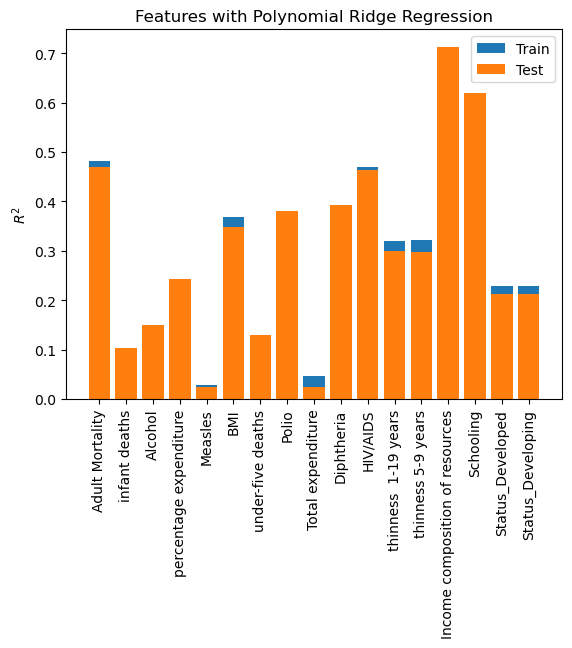

Training R^2 mean value 0.2988022992365552 Testing R^2 mean value 0.2989138541677465 
Training R^2 max value 0.705178731879675 Testing R^2 max value 0.7124079257282122 


In [145]:
get_R2_features(pipe_ridge, features, "Polynomial Ridge")

# Simple Lasso Regression

In [117]:
las = Lasso(alpha=0.1)

In [118]:
las.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
las.score(X_train, y_train)

0.8256949819223256

In [120]:
las.score(X_test, y_test)

0.8166820647347979

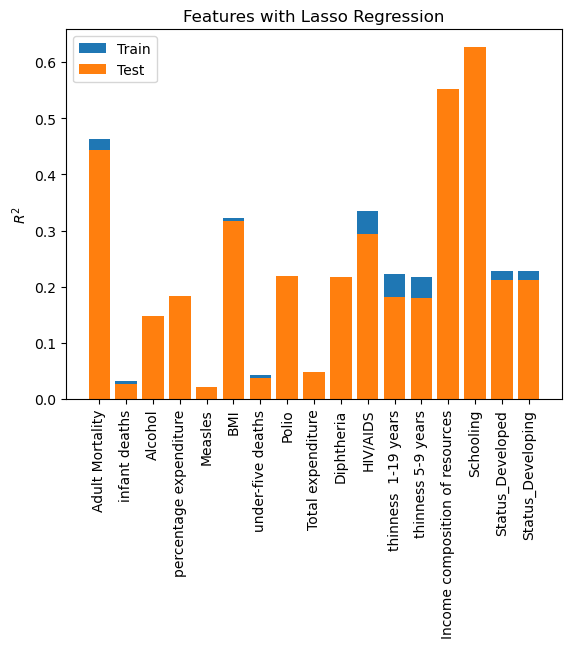

Training R^2 mean value 0.23106271038129658 Testing R^2 mean value 0.23072593868258642 
Training R^2 max value 0.5591114315165528 Testing R^2 max value 0.626790245478031 


In [121]:
get_R2_features(las, features, "Lasso")

# Polynomial Lasso Regression

In [146]:
steps_lasso = [('poly', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('las', Lasso(alpha=0.1))]

In [147]:
pipe_lasso = Pipeline(steps_lasso)

In [148]:
pipe_lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('las', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [149]:
pipe_lasso.score(X_train, y_train)

0.879495952969837

In [150]:
pipe_lasso.score(X_test, y_test)

0.8727481727165781

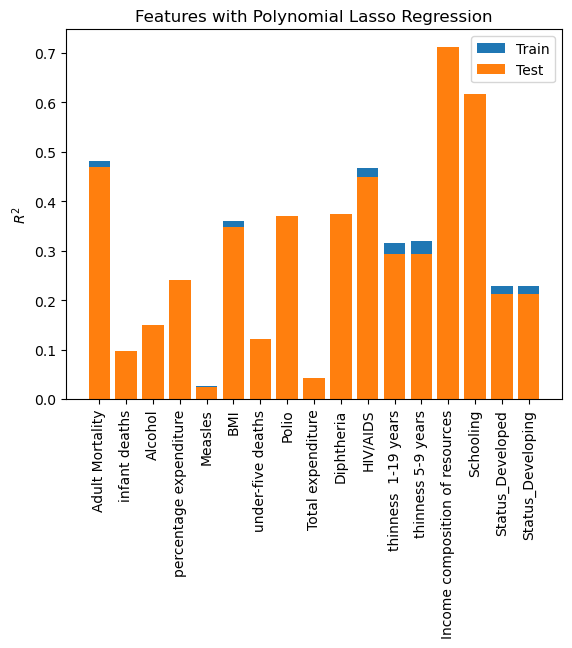

Training R^2 mean value 0.29564428858135805 Testing R^2 mean value 0.29561252137409766 
Training R^2 max value 0.6997476628321218 Testing R^2 max value 0.7119269098669276 


In [151]:
get_R2_features(pipe_lasso, features, "Polynomial Lasso")

# Ridge Regression with Optimal Alpha

In [203]:
steps_ridge_cv = [('poly', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('model', Ridge(alpha=0.1))]

In [204]:
pipe_ridge_cv = Pipeline(steps_ridge_cv)

In [205]:
param_grid = {
     "poly__degree": [1, 2, 3, 4, 5],
     "model__alpha": [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
}

In [206]:
search_ridge = GridSearchCV(pipe_ridge_cv, param_grid, n_jobs=2)

In [207]:
search_ridge.fit(X_train, y_train)
search_ridge

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'poly__degree': [1, 2, 3, 4, 5], 'model__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [208]:
search_ridge.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [209]:
search_ridge.best_params_

{'model__alpha': 3, 'poly__degree': 2}

In [210]:
search_ridge.best_score_

0.9130751959186046

In [211]:
best_ridge = search_ridge.best_estimator_

In [212]:
best_ridge.score(X_test, y_test)

0.9063399373699548

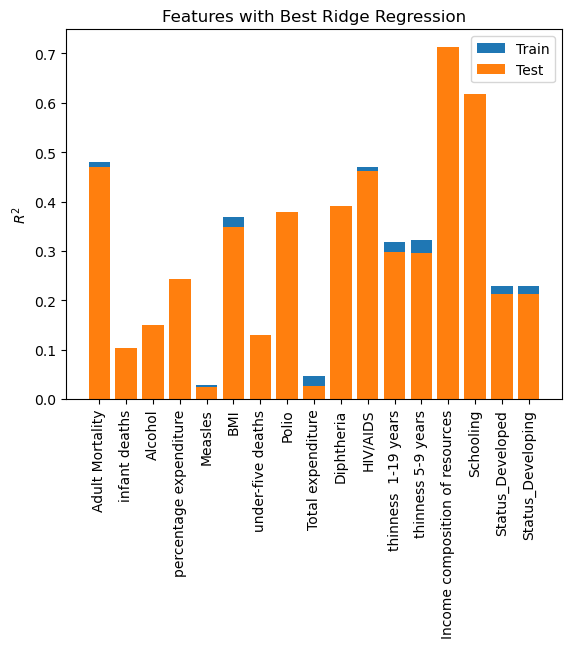

Training R^2 mean value 0.29873917982698295 Testing R^2 mean value 0.29867185830453324 
Training R^2 max value 0.7050474152681279 Testing R^2 max value 0.7128489905386017 


In [213]:

get_R2_features(best_ridge, features, "Best Ridge")

# Lasso Regression with Optimal Alpha

In [ ]:
steps_lasso_cv  = [('poly', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('model', Lasso(alpha=0.1, tol=0.2, max_iter=100000))]

In [175]:
pipe_lasso_cv = Pipeline(steps_lasso_cv)

In [176]:
param_grid = {
     "poly__degree": [1, 2, 3, 4, 5],
     "model__alpha": [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
}

In [177]:
search_lasso = GridSearchCV(pipe_lasso_cv, param_grid, n_jobs=2)

In [178]:
search_lasso.fit(X_train, y_train)
search_lasso

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.2, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'poly__degree': [1, 2, 3, 4, 5], 'model__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [179]:
search_lasso.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.2, warm_start=False))])

In [180]:
search_lasso.best_params_

{'model__alpha': 0.05, 'poly__degree': 5}

In [181]:
search_lasso.best_score_

0.875181971534635

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [189]:
best_lasso = search_lasso.best_estimator_

In [190]:
best_lasso.score(X_test, y_test)

0.849849160816502

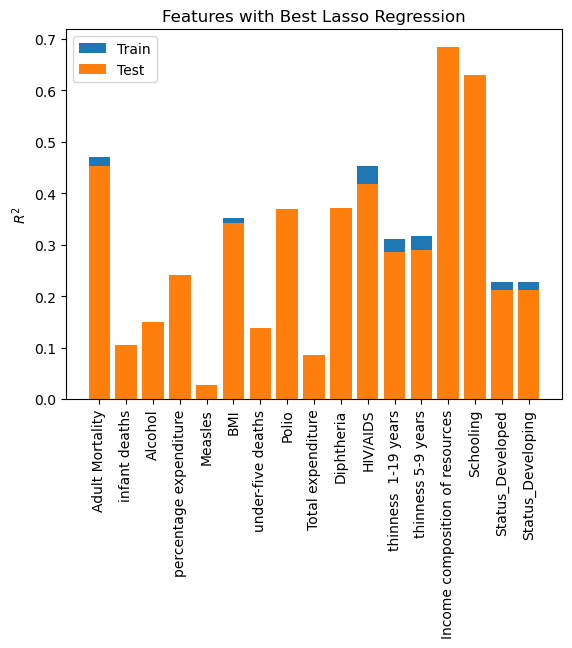

Training R^2 mean value 0.2929376065076028 Testing R^2 mean value 0.29490375208343117 
Training R^2 max value 0.6536293077196006 Testing R^2 max value 0.6839719029018225 


In [191]:
get_R2_features(best_lasso, features, "Best Lasso")

# Elasticnet Regression

In [218]:
steps_elastic = [('poly', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('model', ElasticNet(alpha=0.1, l1_ratio=0.1,tol=0.2, max_iter=100000))]

In [219]:
pipe_elastic = Pipeline(steps_elastic)

In [220]:
param_grid_elastic = {
     "poly__degree": [1, 2, 3, 4, 5],
     "model__alpha": [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30],
     "model__l1_ratio": [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
}

In [222]:
search_elastic = GridSearchCV(pipe_elastic, param_grid_elastic, n_jobs=2)

In [223]:
search_elastic.fit(X_train, y_train)
search_elastic

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklea

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.2, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'poly__degree': [1, 2, 3, 4, 5], 'model__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30], 'model__l1_ratio': [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [224]:
search_elastic.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.2, warm_start=False))])

In [225]:
search_elastic.best_params_

{'model__alpha': 0.3, 'model__l1_ratio': 0.1, 'poly__degree': 5}

In [226]:
search_elastic.best_score_

0.9071501689142346

In [227]:
best_elastic = search_elastic.best_estimator_

In [228]:
best_elastic.score(X_test, y_test)

0.8515255237020576

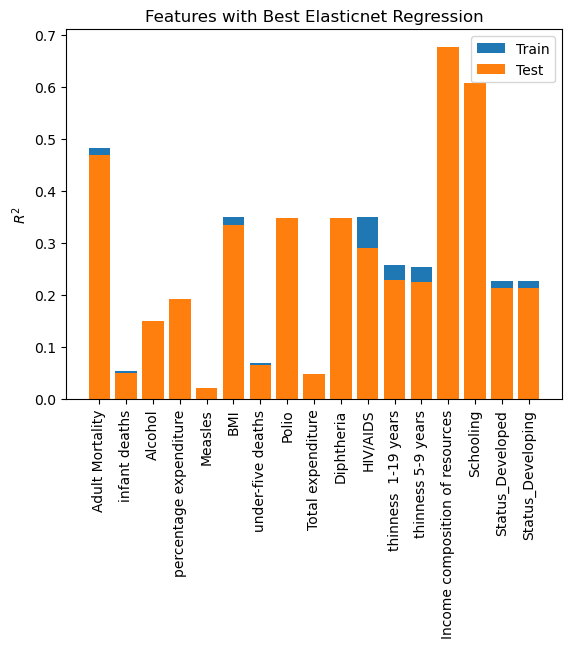

Training R^2 mean value 0.26719805001689767 Testing R^2 mean value 0.2633451751798665 
Training R^2 max value 0.6567480883880727 Testing R^2 max value 0.6762706515913217 


In [230]:
get_R2_features(best_elastic, features, "Best Elasticnet")

# 4. Insights and key findings


In [232]:
ss = StandardScaler()

In [236]:
X_train_p = X_train

In [237]:
X_train_p[:] = ss.fit_transform(X_train, y_train)

In [238]:
X_train_p.columns = [f'{c} (scaled)' for c in X_train_p.columns]

In [240]:
X_train_p.shape

(2044, 17)

In [242]:
pca = PCA()

In [243]:
pca.fit(X_train_p)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [244]:
X_train_hat = pca.transform(X_train)
print(X_train_hat.shape)

(2044, 17)


In [245]:
X_train_hat_PCA = pd.DataFrame(columns=[f'Projection  on Component {i+1}' for i in range(len(X_train_p.columns))], data=X_train_hat)
X_train_hat_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,Projection on Component 11,Projection on Component 12,Projection on Component 13,Projection on Component 14,Projection on Component 15,Projection on Component 16,Projection on Component 17
0,-0.360821,0.026550,-0.420682,0.796072,0.611406,0.794329,0.396872,-0.034154,-0.035550,1.814141,-1.037231,-0.188943,0.209555,0.081530,-0.054574,-0.057701,4.508664e-16
1,-3.777780,1.130357,0.711236,0.204278,-0.193211,-0.078103,0.692929,-1.523075,0.252207,-0.398918,-0.015738,0.250637,-0.099253,-0.398606,0.021856,0.001394,-8.244517e-16
2,1.859086,0.262529,-0.153952,-0.986870,0.902519,-0.035541,1.441635,0.344524,-1.048432,-0.016355,-0.913803,-0.583477,-0.004713,0.077117,-0.035367,0.031046,6.228839e-17
3,2.766586,-0.352287,-0.323825,-0.329397,-2.401566,-0.962420,-0.164942,0.089278,0.532892,0.066732,0.020706,-0.232236,0.025314,0.427298,-0.052899,0.000168,-1.042451e-16
4,0.478429,-1.132260,-0.412233,-0.275714,0.654183,1.262159,1.088208,-0.249815,-0.820378,-0.389877,0.982382,1.243223,-0.005144,1.591163,0.058126,-0.022154,-1.042451e-16


Text(0.5, 1.0, 'Component-wise variance and cumulative explained variance')

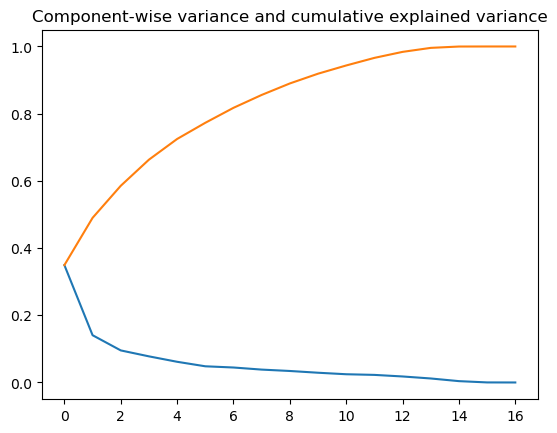

In [246]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise variance and cumulative explained variance")

In [247]:
N = 14
X_train_hat_PCA = X_train_hat_PCA.iloc[:, :N]

In [ ]:
enet = ElasticNet(tol = 0.2, alpha=0.3, l1_ratio=0.1)

In [253]:
steps_pca = [("ss", StandardScaler()), ("pca", PCA(n_components=N)),("enet", ElasticNet(tol=0.2, alpha=0.3, l1_ratio=0.1))]

In [254]:
pipe_pca = Pipeline(steps_pca)

In [255]:
pipe_pca.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('enet', ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.2, warm_start=False))])

In [256]:
pipe_pca.score(X_train, y_train)

0.8153112573364869

In [257]:
pipe_pca.score(X_test, y_test)

-80754.46773377477

In [28]:
columns = list(features)
columns

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_Developed',
 'Status_Developing']

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>

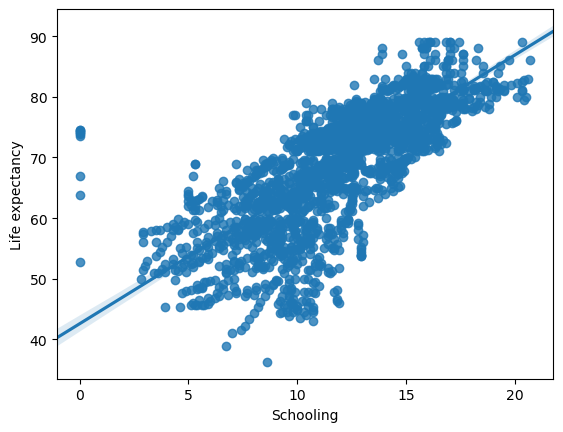

In [30]:
sns.regplot(x=X.Schooling, y=y)

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy'>

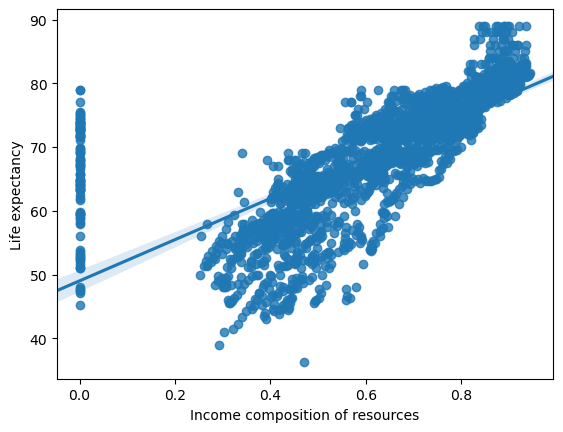

In [31]:
sns.regplot(x=X['Income composition of resources'], y=y)

<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>

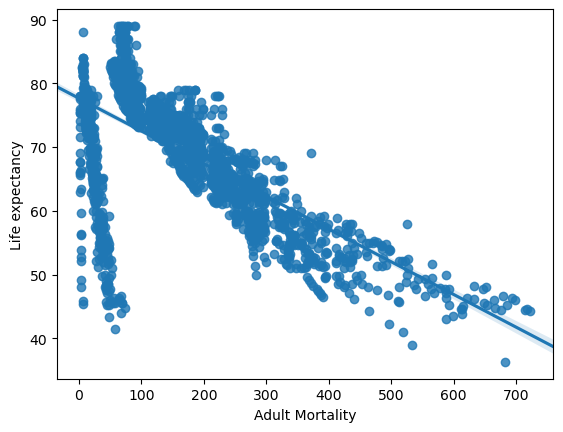

In [32]:
sns.regplot(x=X['Adult Mortality'], y=y)

# Bonus: Outlier Removal

## Theil-Sen Regression

In [33]:
from sklearn.linear_model import TheilSenRegressor

In [34]:
ts = TheilSenRegressor()

In [35]:
ts.fit(X_train, y_train)

TheilSenRegressor(max_subpopulation=10000)

In [36]:
ts.score(X_train, y_train)

0.5757228239722691

In [37]:
ts.score(X_test, y_test)

0.6726921917560384

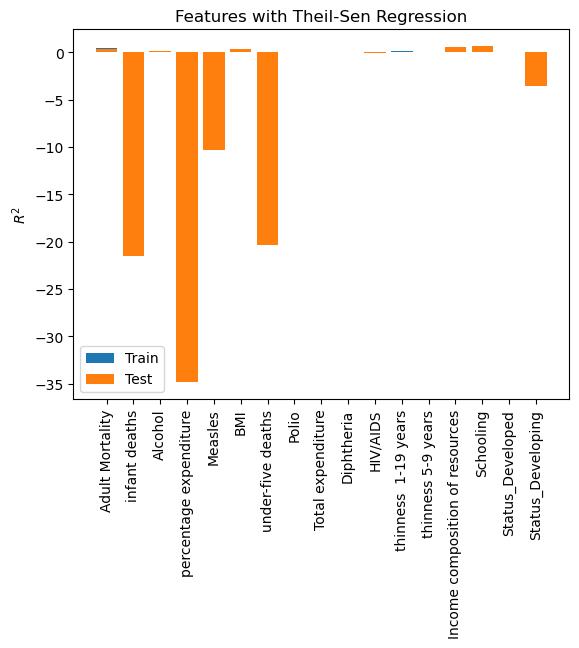

Training R^2 mean value -4.709352709874034 Testing R^2 mean value -5.206743635505019 
Training R^2 max value 0.553919359990752 Testing R^2 max value 0.6264096343935065 


In [40]:
get_R2_features(ts, features, "Theil-Sen")

## Huber Regression

In [41]:
from sklearn.linear_model import HuberRegressor

In [119]:
hr = HuberRegressor(alpha=0.1)

In [120]:
hr.fit(X_train, y_train)

HuberRegressor(alpha=0.1)

In [121]:
hr.score(X_train, y_train)

0.04303974324108695

In [122]:
hr.score(X_test, y_test)

0.11244438159420378

## RANSAC Regression

In [100]:
from sklearn.linear_model import RANSACRegressor

In [101]:
ran = RANSACRegressor()

In [102]:
ran.fit(X_train, y_train)

RANSACRegressor()

In [103]:
ran.score(X_train, y_train)

0.6740018202519784

In [104]:
ran.score(X_test, y_test)

0.6328657030866152

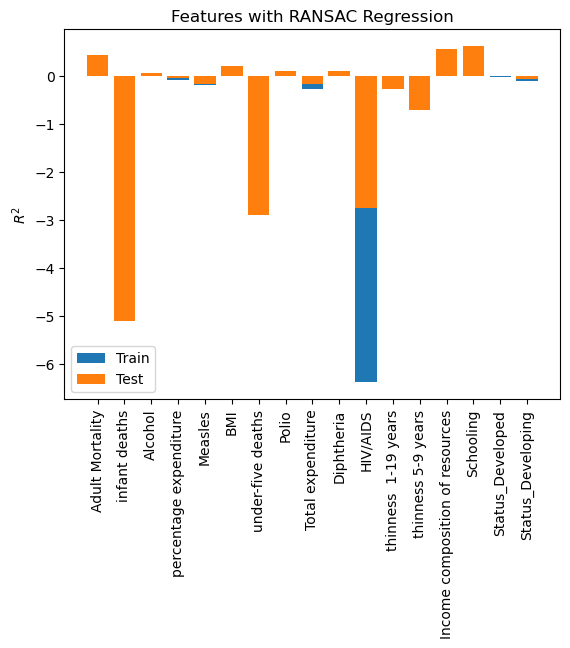

Training R^2 mean value -0.7907883016040842 Testing R^2 mean value -0.5975545266832372 
Training R^2 max value 0.5333568443029375 Testing R^2 max value 0.617372640129428 


In [105]:
get_R2_features(ran, features, "RANSAC")

# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
